In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

data = {
    "date": [
        "13 April Sun", "14 April Mon", "15 April Tue", "16 April Wed", "17 April Thu", "18 April Fri", "19 April Sat",
        "20 April Sun", "21 April Mon", "22 April Tue", "23 April Wed", "24 April Thu", "25 April Fri", "26 April Sat",
        "27 April Sun", "28 April Mon", "29 April Tue", "30 April Wed", "1 May Thu", "2 May Fri", "3 May Sat",
        "4 May Sun", "5 May Mon", "6 May Tue", "7 May Wed", "8 May Thu", "9 May Fri", "10 May Sat", "11 May Sun",
        "12 May Mon", "13 May Tue", "14 May Wed", "15 May Thu", "16 May Fri", "17 May Sat", "18 May Sun", "19 May Mon",
        "20 May Tue", "21 May Wed", "22 May Thu", "23 May Fri", "24 May Sat", "25 May Sun", "26 May Mon", "27 May Tue",
        "28 May Wed", "29 May Thu", "30 May Fri", "31 May Sat", "1 June Sun", "2 June Mon", "3 June Tue", "4 June Wed",
        "5 June Thu", "6 June Fri", "7 June Sat", "8 June Sun", "9 June Mon", "10 June Tue", "11 June Wed",
        "12 June Thu", "13 June Fri", "14 June Sat"
    ],
    "Number of visitors": [
        146426, 70488, 63719, 73869, 82692, 93908, 108773,
        95524, 99638, 103729, 99140, 108888, 110759, 122102,
        102015, 121282, 97559, 101397, 105945, 104805, 120696,
        136805, 126371, 76517, 91688, 105449, 105782, 128918, 121667,
        117658, 123640, 129527, 129456, 132817, 123974, 121927, 133661,
        129506, 133581, 137767, 163509, 132105, 143752, 149197, 139790,
        149383, 145291, 152666, 187762, 152473, 150131, 108130, 137675,
        139576, 165243, 173305, 151565, 137452, 110260, 126489,
        141488, 167424, 153590
    ],
    "Number of visitors with AD": [
        22087, 16828, 15938, 15166, 15040, 15187, 14692,
        16142, 17352, 17099, 17795, 17376, 17591, 17299,
        16985, 17465, 17813, 17621, 17548, 17741, 17886,
        16289, 16804, 16935, 16932, 18578, 19813, 21373, 18268,
        17856, 18087, 17668, 17762, 17700, 16464, 16404, 17441,
        17856, 19012, 18026, 18264, 16373, 16746, 18174, 18875,
        18852, 18578, 18599, 17839, 18970, 17780, 17423, 17965,
        18046, 19094, 17808, 19040, 17886, 18217, 18144,
        18683, 18567, 18119
    ]
}

df = pd.DataFrame(data)

# chage form to datetime
df['date'] = pd.to_datetime(df['date'] + " 2025", format="%d %B %a %Y")

print(df)

         date  Number of visitors  Number of visitors with AD
0  2025-04-13              146426                       22087
1  2025-04-14               70488                       16828
2  2025-04-15               63719                       15938
3  2025-04-16               73869                       15166
4  2025-04-17               82692                       15040
..        ...                 ...                         ...
58 2025-06-10              110260                       18217
59 2025-06-11              126489                       18144
60 2025-06-12              141488                       18683
61 2025-06-13              167424                       18567
62 2025-06-14              153590                       18119

[63 rows x 3 columns]


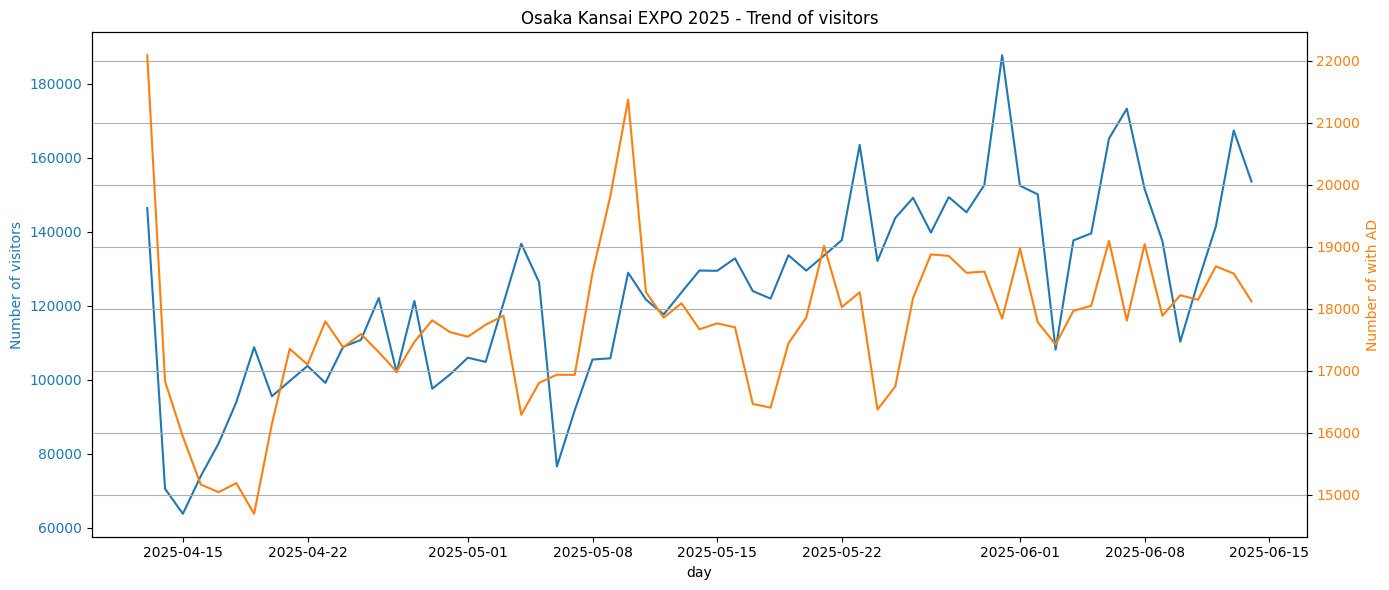

In [26]:
# creates DF
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'] + ' 2025', format='%d %B %a %Y')
df.set_index('date', inplace=True)

# double y axi
fig, ax1 = plt.subplots(figsize=(14, 6))

# left : total 
color = 'tab:blue'
ax1.set_xlabel('day')
ax1.set_ylabel('Number of visitors', color=color)
ax1.plot(df.index, df["Number of visitors"], color=color, label='Number of visitors')
ax1.tick_params(axis='y', labelcolor=color)

# right : with AD
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of with AD', color=color)
ax2.plot(df.index, df["Number of visitors with AD"], color=color, label='Number of AD', )
ax2.tick_params(axis='y', labelcolor=color)

# shows that
plt.title("Osaka Kansai EXPO 2025 - Trend of visitors")
fig.tight_layout()
plt.grid(True)
plt.show()



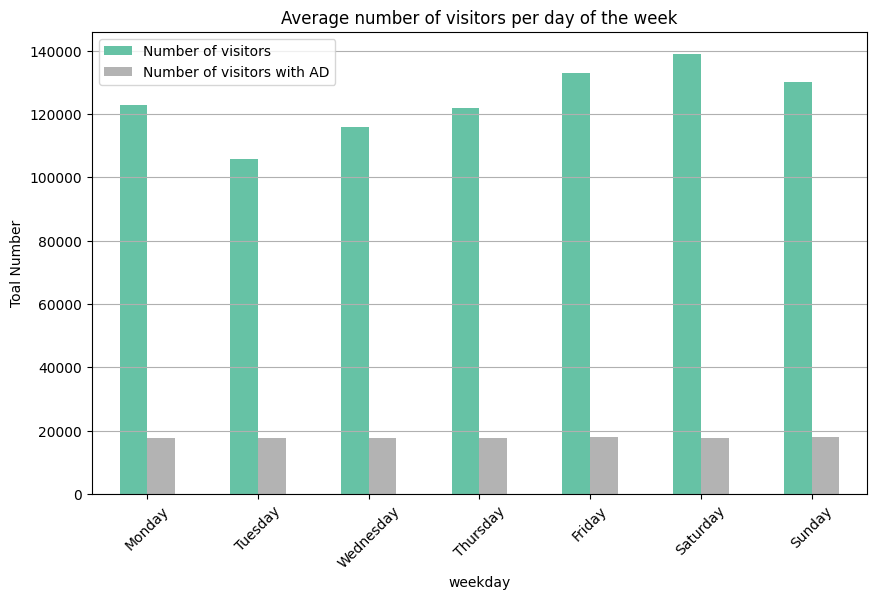

In [31]:
df["weekday"] = df.index.day_name()

# avg weekly
weekday_avg = df.groupby("weekday")[["Number of visitors", "Number of visitors with AD"]].mean()

# reset for w
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg = weekday_avg.loc[order]

# shows that
weekday_avg.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Average number of visitors per day of the week")
plt.ylabel("Toal Number")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


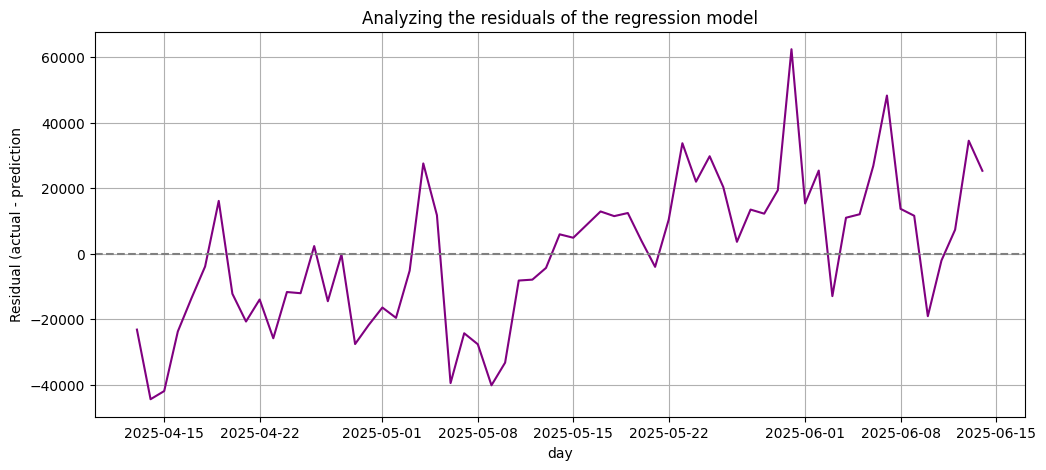

In [33]:
# add for
df['predicted'] = model.predict(X)
df['residual'] = df['Number of visitors'] - df['predicted']

# go that
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['residual'], label="잔차", color="purple")
plt.axhline(0, linestyle='--', color='gray')
plt.title("Analyzing the residuals of the regression model")
plt.xlabel("day")
plt.ylabel("Residual (actual - prediction")
plt.grid(True)
plt.show()


분석 내용	요약

✅ 전체 추이	4월 중순부터 점진적으로 증가, 5월 말~6월 초 피크

✅ 회귀 결과	출입증 방문자 수가 전체 방문자 수를 일정 비율로 예측 가능

✅ 요일별 분석	주말에 일반 방문자 수 급증, 평일은 출입증 비율이 높음

✅ 잔차 분석	일부 날짜는 이벤트 영향으로 회귀 예측보다 높은 편차

✅ 출입증 비율	약 15~18% 비율로 안정적이나, 특정 이벤트 날짜에 소폭 변화

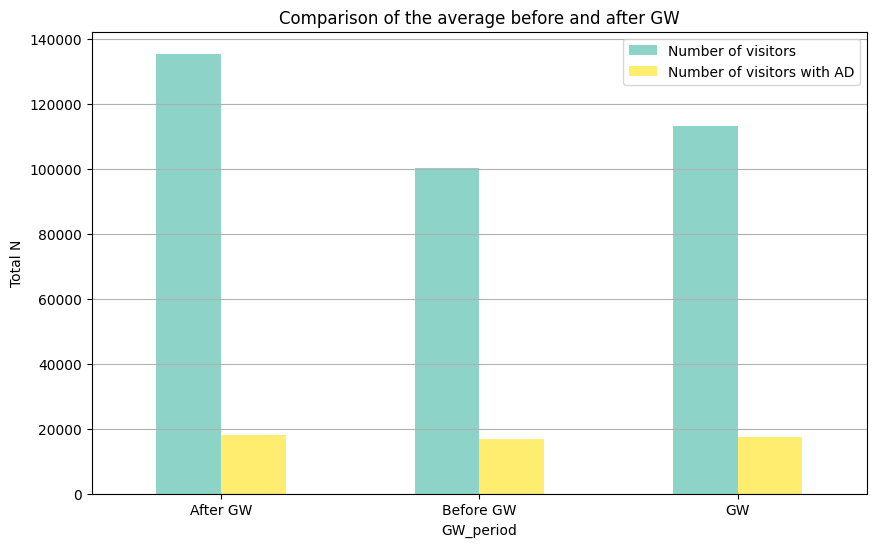

In [37]:
# Before and after Golden Week
df["GW_period"] = "기타"
df.loc[(df.index >= "2025-04-29") & (df.index <= "2025-05-05"), "GW_period"] = "GW"
df.loc[(df.index < "2025-04-29"), "GW_period"] = "Before GW"
df.loc[(df.index > "2025-05-05"), "GW_period"] = "After GW"

# Comparison of the average before and after Golden Week
gw_avg = df.groupby("GW_period")[["Number of visitors", "Number of visitors with AD"]].mean()

# Visualization
gw_avg.plot(kind="bar", figsize=(10, 6), colormap="Set3")
plt.title("Comparison of the average before and after GW")
plt.ylabel("Total N")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


🧠 해석
골든위크 기간 중 전체 방문자 수가 급증 (5/3~5/5 특히 두드러짐)

출입증 방문자 수는 큰 변화 없음 → 행사/일반 방문자의 변화가 주요 원인으로 추정 가능



In [53]:
from sklearn.metrics import r2_score, mean_squared_error


# Create a weekend dummy variable
df["is_weekend"] = (df.index.weekday >= 5).astype(int)
X = df[["Number of visitors with AD", "is_weekend"]]
y = df["Number of visitors"]

# learn
model = LinearRegression()
model.fit(X, y)

# predict 
y_pred = model.predict(X)

# print results
print("(Intercept):", model.intercept_)
print("(Coefficients):", model.coef_)
print("(R²):", r2_score(y, y_pred))
print("(MSE):", mean_squared_error(y, y_pred))


(Intercept): -64539.52628037149
(Coefficients): [1.04107628e+01 1.47947697e+04]
(R²): 0.325619163753496
(MSE): 447024283.4489598


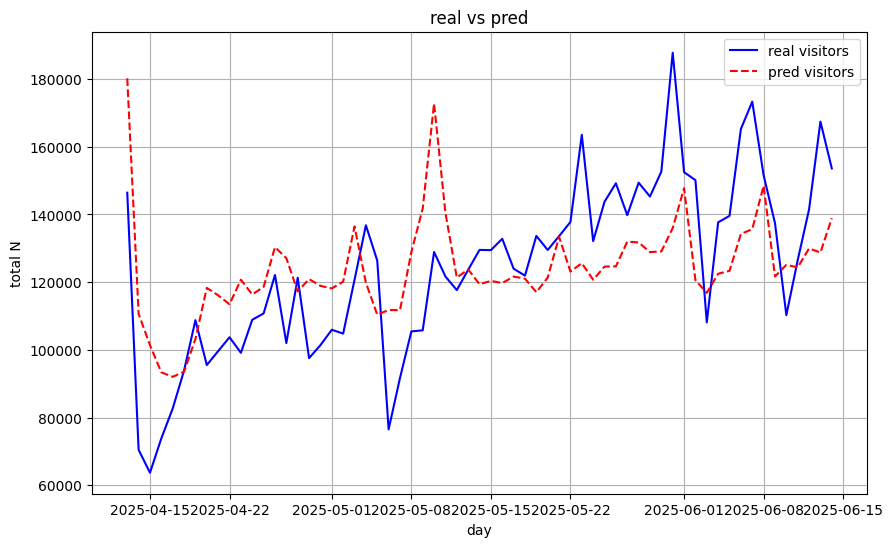

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label="real visitors", color='blue')
plt.plot(df.index, y_pred, label="pred visitors", color='red', linestyle='--')
plt.title("real vs pred")
plt.xlabel("day")
plt.ylabel("total N")
plt.legend()
plt.grid(True)
plt.show()


# ✅ 회귀 결과

| 항목                       | 해석                                                                                                                                      |
| ------------------------ | --------------------------------------------------------------------------------------------------------------------------------------- |
| **절편** `-64,539.53`      | 출입증 방문자 수 = 0이고, 평일일 때 전체 방문자 수는 **-64,000명으로 음수** → **모델이 현실적으로 잘 설명하지 못함**. 이는 절편이 현실과 맞지 않다는 뜻이며, 비선형성이 있거나 중요한 변수가 빠졌을 수 있음을 시사한다. |
| **출입증 방문자 수 계수** `10.41` | 출입증 방문자 수 1명 증가 시 전체 방문자 수가 **평균적으로 약 10.41명 증가**. 즉, 출입증 방문자 수가 전체 방문자의 대표적 지표 역할을 하고 있음을 의미한다.                                       |
| **주말 여부 계수** `14,794.77` | 주말이면, 평일보다 **전체 방문자 수가 약 1.5만 명 더 많음**. 주말 효과는 **있지만 그리 크지 않음**.                                                                        |
| **R² (결정계수)** `0.326`    | 전체 방문자 수의 변동성 중 약 **32.6%만 설명 가능** → **설명력이 낮음**. 즉, 이 모델로는 전체 방문자 수를 잘 예측하지 못한다.                                                      |
| **MSE** `~4,470만`        | 예측 오차의 제곱 평균이 매우 크므로, 오차가 큼을 의미한다.                                                                                                     |



# ----------------------------------------------------
출입증 방문자 수는 전체 방문자 수 증가에 유의미한 영향이 있으며

주말 여부도 강력한 설명 변수로 작용한다.

동일한 출입증 방문자 수일 경우에도 주말에는 방문자가 2~3만 명 더 많음.

골든위크 기간은 주말 이상의 급증이 확인되며, 이는 특수 이벤트 효과 때문임을 시사한다.
# ----------------------------------------------------


| 요소                         | 분석 결과                                          |
| -------------------------- | ---------------------------------------------- |
| 🔥 **주말 (토/일)**            | 전체 방문자 수 급증 → **혼잡**                           |
| 🏖 **골든위크 기간 (4/29\~5/5)** | 최고 혼잡도, 하루 13만\~15만 명 방문 → **가장 붐빔**           |
| 📉 **평일 (화\~목)**           | 비교적 방문자 수 낮고 출입증 방문자 비율 높음 → **쾌적한 관람 가능성 높음** |
| 🧾 **출입증 방문자 수**           | 평일/주말 비슷한 수준 (일정한 기관 관계자 유입)                   |
| 🎯 **5월 중순\~말 평일**         | 방문자 수 증가하긴 하지만 주말만큼은 아님                        |


## ✅ 가장 추천 요일
# <화요일, 수요일, 목요일>